In [12]:
%pylab inline 
%load_ext autoreload
%autoreload 2
import pickle
import numpy as np

Populating the interactive namespace from numpy and matplotlib
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
import jax_cosmo as jc
import jax.numpy as np
import jax

cosmo = jc.Planck15()

In [ ]:
#nc=128 steps =5

In [14]:
results_dict = pickle.load( open( "/Users/dl264294/Desktop/github/DifferentiableHOS/scripts/new_results.pk", "rb" ) )

In [15]:
k=results_dict['k']
ps=results_dict['power_spectrum']
jac=results_dict['jac']

Populating the interactive namespace from numpy and matplotlib


/Users/dl264294/.conda/envs/env_nbody/lib/python3.8/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['np']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


Text(0, 0.5, 'P(k)')

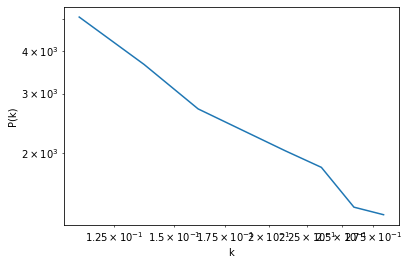

In [16]:
%pylab inline
#white noise powerspectra...
plt.loglog(k,ps)
plt.xlabel("k")
plt.ylabel("P(k)")

In [17]:
import jax_cosmo.transfer as tklib
ps_jax_nonlinear=jc.power.nonlinear_matter_power(cosmo, k,a=1.0)
ps_jax_linear=jc.power.linear_matter_power(cosmo, k,a=1.0)

/Users/dl264294/.local/lib/python3.8/site-packages/jax/_src/lax/lax.py:6081: UserWarning: Explicitly requested dtype <class 'jax._src.numpy.lax_numpy.int64'> requested in astype is not available, and will be truncated to dtype int32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  warnings.warn(msg.format(dtype, fun_name , truncated_dtype))


Populating the interactive namespace from numpy and matplotlib


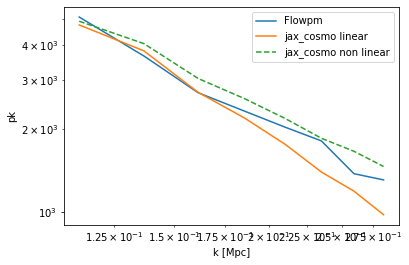

In [18]:
%pylab inline
loglog(k,ps,label='Flowpm')
loglog(k,ps_jax_linear, label='jax_cosmo linear')
loglog(k,ps_jax_nonlinear, '--', label='jax_cosmo non linear')
legend()
xlabel('k [Mpc]')
ylabel('pk');

In [20]:
def mean_fn(p):
  cosmo = jc.Planck15(Omega_c=p[0], sigma8=p[1])
  m=jc.power.linear_matter_power(cosmo, k,a=1.0)
  return m.flatten()
jac_mean = jax.jit(jax.jacfwd(mean_fn))
params = np.array([cosmo.Omega_c, cosmo.sigma8]) 
dmu = jac_mean(params)

/Users/dl264294/.local/lib/python3.8/site-packages/jax/_src/lax/lax.py:6081: UserWarning: Explicitly requested dtype <class 'jax._src.numpy.lax_numpy.int64'> requested in astype is not available, and will be truncated to dtype int32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  warnings.warn(msg.format(dtype, fun_name , truncated_dtype))


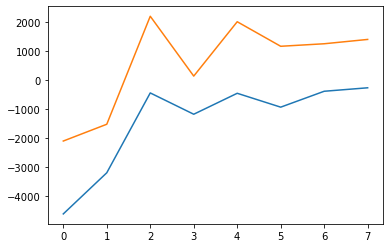

In [21]:
plot(jac[:,0])
plot(dmu[:, 0])

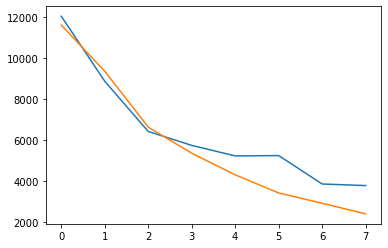

In [22]:
plot(jac[:,1])
plot(dmu[:, 1])

In [ ]:
#nc=64 steps=20

In [23]:
results_dict1 = pickle.load( open( "/Users/dl264294/Desktop/github/DifferentiableHOS/scripts/new_results64.pk", "rb" ) )

In [24]:
k1=results_dict1['k']
ps1=results_dict1['power_spectrum']
jac1=results_dict1['jac']

Populating the interactive namespace from numpy and matplotlib


Text(0, 0.5, 'P(k)')

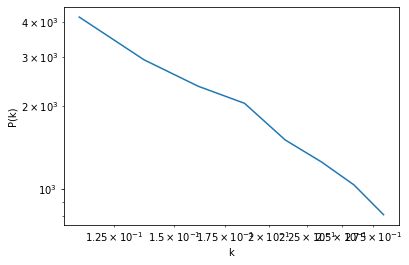

In [25]:
%pylab inline
#white noise powerspectra...
plt.loglog(k1,ps1)
plt.xlabel("k")
plt.ylabel("P(k)")

In [28]:

ps_jax_nonlinear1=jc.power.nonlinear_matter_power(cosmo, k1,a=1.0)
ps_jax_linear1=jc.power.linear_matter_power(cosmo, k1,a=1.0)

/Users/dl264294/.local/lib/python3.8/site-packages/jax/_src/lax/lax.py:6081: UserWarning: Explicitly requested dtype <class 'jax._src.numpy.lax_numpy.int64'> requested in astype is not available, and will be truncated to dtype int32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  warnings.warn(msg.format(dtype, fun_name , truncated_dtype))


Populating the interactive namespace from numpy and matplotlib


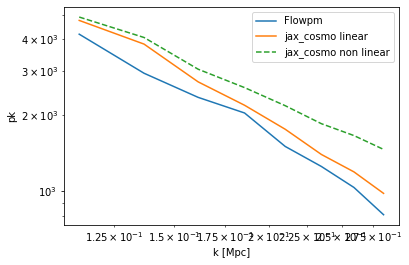

In [29]:
%pylab inline
loglog(k1,ps1,label='Flowpm')
loglog(k1,ps_jax_linear1, label='jax_cosmo linear')
loglog(k1,ps_jax_nonlinear1, '--', label='jax_cosmo non linear')
legend()
xlabel('k [Mpc]')
ylabel('pk');